<h1><center>Machine Learning Challenge: Image Classification</center></h1>

Goutham Indiran Deekshit | u195004 <br>
Manav Mishra | u558101 <br>
Sadjia Safdari | u265740

**Load packages**

In [1]:
import numpy as np
%pylab inline --no-import-all
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

## Neural nets
#.....................................
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Conv2D, Flatten, MaxPooling2D, GaussianNoise
from keras.callbacks import History
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.metrics import TopKCategoricalAccuracy, SparseTopKCategoricalAccuracy

## Image processing packages
#.....................................
from skimage.transform import resize
from skimage import data
from skimage.filters import threshold_otsu, rank
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.feature import canny
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
import cv2

## Matplot lib
#.....................................
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Random Forest
import random
from sklearn import ensemble #psychic learn we use ensemble - it has random forest classifier



Populating the interactive namespace from numpy and matplotlib


In [2]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


## Task 1

**Data**

In [3]:
with np.load("data/training-dataset.npz") as data:
        img = data["x"] # 97843200
        lbl = data["y"] # 124800

In [4]:
# new_lbl = []
# for l in lbl:
#     new_lbl.append(str(l).zfill(2))
# #print(new_lbl)

# y = np.asarray(new_lbl)
# print(y)

# x = np.char.zfill(y, 2)
# h = x.astype("uint8")
# print(h.dtype)

(124800, 784)


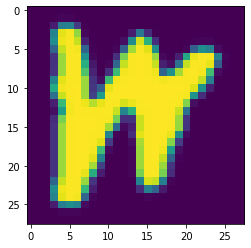

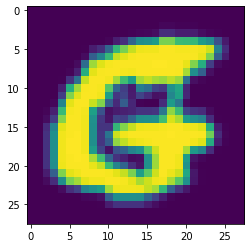

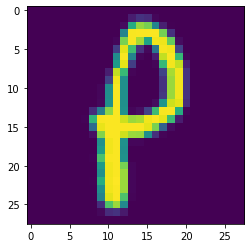

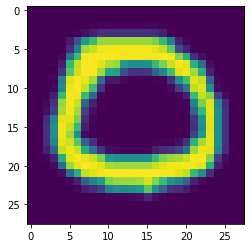

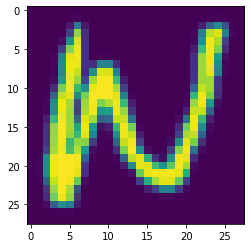

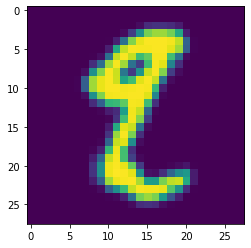

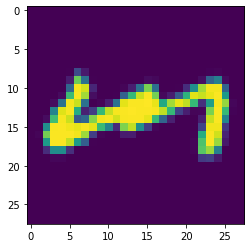

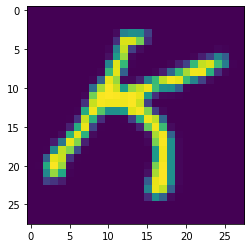

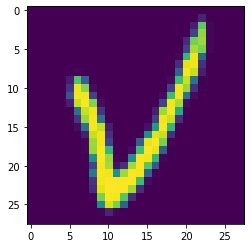

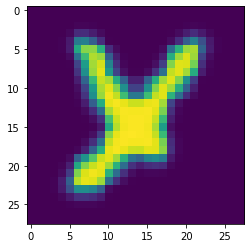

In [5]:
print(img.shape)

for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

### 1.1 Neural Networks

**Splitting data**

In [18]:
# Splitting data into train and test with 80% for training data 

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl, test_size=0.2,random_state=1) 

# Splitting 

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1)

# Visualising the shape of the train and test data
print(X_train.shape) 
print(X_test.shape) 
print(X_val.shape) 
print(y_test.shape) 
print(y_val.shape) 


(99840, 784)
(7488, 784)
(17472, 784)
(7488,)
(17472,)


**Preprocessing data**

In [19]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

**Transform data**

In [20]:
# One hot decoding 
onehot = LabelBinarizer() # transform categorical target to dummies to train the NN
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)


**Fitting the model**

In [21]:
# Fitting the compiling and fitting the sequential model
#.....................................

es = EarlyStopping(monitor="val_loss")

model = Sequential() # initiates model
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# define parameters for training of the model    
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy']) # for classification, the loss function should be categorical_crossentropy
history = model.fit(X_train, Y_train, epochs=100, batch_size=450, validation_data=(X_val, Y_val), verbose=1, callbacks = [es])

# accuracy 0.9056 > 17/100

Epoch 1/100
222/222 [==============================] - 57s 255ms/step - loss: 2.8147 - accuracy: 0.2995 - val_loss: 1.2021 - val_accuracy: 0.6634
Epoch 2/100
222/222 [==============================] - 51s 229ms/step - loss: 1.0742 - accuracy: 0.7002 - val_loss: 0.8396 - val_accuracy: 0.7657
Epoch 3/100
222/222 [==============================] - 53s 238ms/step - loss: 0.7753 - accuracy: 0.7832 - val_loss: 0.6669 - val_accuracy: 0.8170
Epoch 4/100
222/222 [==============================] - 50s 225ms/step - loss: 0.6168 - accuracy: 0.8280 - val_loss: 0.5617 - val_accuracy: 0.8440
Epoch 5/100
222/222 [==============================] - 50s 227ms/step - loss: 0.5304 - accuracy: 0.8533 - val_loss: 0.5026 - val_accuracy: 0.8610
Epoch 6/100
222/222 [==============================] - 50s 226ms/step - loss: 0.4722 - accuracy: 0.8698 - val_loss: 0.4575 - val_accuracy: 0.8761
Epoch 7/100
222/222 [==============================] - 51s 229ms/step - loss: 0.4281 - accuracy: 0.8828 - val_loss: 0.4303 -

**Evaluate**

**Accuracy and Loss visualization**

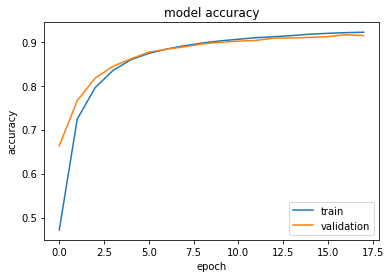

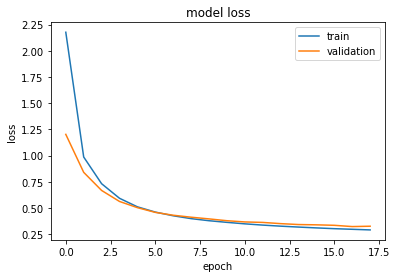

In [22]:
# list all data in history

accuracy = history.history['accuracy']
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Confusion Matrix**

In [23]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Predict the values from the validation dataset
# Y_pred = model.predict(X_val)
# # Convert predictions classes to one hot vectors 
# Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
# Y_true = np.argmax(Y_val,axis = 1) 
# # compute the confusion matrix
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# # plot the confusion matrix
# f,ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

**Saving Model**

In [12]:
# # Save the model to disk.
# model.save_weights('model.h5')

# # Load the model from disk later using:
# model.load_weights('model.h5')



**Predictions**

In [24]:
# Predicting the classes on test set and printing the accuracy
y_pred = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred)) # 0.889


  1/234 [..............................] - ETA: 28s

/Users/Sadjia/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


234/234 [==============================] - 1s 5ms/step
0.004006410256410256


**Model Summary**

In [25]:
# Evaluating the model
model.evaluate(X_test,Y_test)

# Model summary
model.summary()
print((y_pred[:10]))
print((y_test[:10]).astype('int32'))

234/234 [==============================] - 2s 7ms/step - loss: 0.3217 - accuracy: 0.9108
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 350)               280350    
_________________________________

### 1.2 Random Forest

(124800, 784)


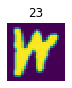

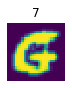

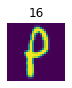

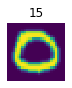

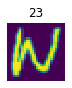

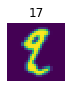

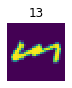

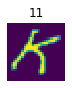

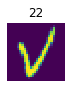

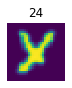

In [15]:
with np.load('data/training-dataset.npz') as data:
    img = data['x']
    lbl = data['y']
print(img.shape)


for im in range(10):
    image = img[im]
    label = lbl[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.subplot(2,5, im+1)
    plt.axis("off")
    plt.imshow(pixels)
    plt.title('%i' %label)
    plt.show()

In [16]:
X_train, X_val, y_train, y_val = train_test_split(img, lbl, test_size=0.2, random_state=1) #first split train 80, val+test 20

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3
                   , random_state=1) 

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(99840, 784)
(7488, 784)
(17472, 784)


In [18]:
#Using Random Forest classifier
#oob_score This is a random forest cross validation method 
#This comes out very handy while scalling up a particular function from prototype to final dataset.

n_estimators = np.arange(100,1100,100)
import time
t0 = time.time()
for i in n_estimators: 
    classifier = ensemble.RandomForestClassifier(n_estimators = i, oob_score = True, n_jobs = -1,random_state =50)
    classifier.fit(X_train,y_train)
    # evaluating the model on the validation set and checking best value of k
    score = classifier.score(X_val,y_val)
    print("No. of trees = %d, accuracy=%.2f%%" % (i, score * 100))

t1 = time.time()
total = t1-t0
print(total) 

No. of trees = 100, accuracy=87.96%
No. of trees = 200, accuracy=88.32%
No. of trees = 300, accuracy=88.51%
No. of trees = 400, accuracy=88.57%
No. of trees = 500, accuracy=88.64%
No. of trees = 600, accuracy=88.71%
No. of trees = 700, accuracy=88.67%
No. of trees = 800, accuracy=88.74%
No. of trees = 900, accuracy=88.70%
No. of trees = 1000, accuracy=88.76%
7456.962507009506


In [19]:
#training model on train data with best value of n_estimators
classifier = ensemble.RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1,random_state =50)
import time
t0 = time.time()
classifier.fit(X_train,y_train)
t1 = time.time()
total = t1-t0
print(total) 
#takes approx. 20 minutes

1761.148670911789


In [20]:
# predict on test set
score = classifier.score(X_test,y_test) 
score # 0.8791


0.8791399572649573

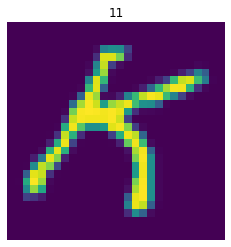

In [21]:
im=7 #try changing different values 
view_img = img[im]
label = lbl[im]
view_img = np.array(view_img, dtype='float')
pixels = view_img.reshape((28, 28))
plt.axis("off")
plt.imshow(pixels)
plt.title('%i' %label)
plt.show()

In [22]:
# check the prediction for the above image
classifier.predict(img[[7]])

array([11], dtype=uint8)

## **Task 2**

### 2.1 Adding Gaussian noise to CNN model

In [26]:
# Making the model Robust against noises in the image
test_data = np.load('data/test-dataset.npy') 
print(test_data.shape)


(10000, 30, 140)


In [27]:
# compiling and fitting the sequential model
#.....................................

es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GaussianNoise(0.5))
model.add(Flatten())
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
history1 = model.fit(X_train, Y_train, epochs=100, batch_size = 450, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

# accuracy of 0.9253 > 23/100

Epoch 1/100
222/222 [==============================] - 72s 322ms/step - loss: 3.3497 - accuracy: 0.0689 - val_loss: 1.5155 - val_accuracy: 0.5935
Epoch 2/100
222/222 [==============================] - 81s 366ms/step - loss: 1.3490 - accuracy: 0.6330 - val_loss: 0.8930 - val_accuracy: 0.7771
Epoch 3/100
222/222 [==============================] - 74s 332ms/step - loss: 0.8670 - accuracy: 0.7791 - val_loss: 0.7026 - val_accuracy: 0.8325
Epoch 4/100
222/222 [==============================] - 81s 364ms/step - loss: 0.6927 - accuracy: 0.8303 - val_loss: 0.5984 - val_accuracy: 0.8602
Epoch 5/100
222/222 [==============================] - 77s 347ms/step - loss: 0.5997 - accuracy: 0.8575 - val_loss: 0.5326 - val_accuracy: 0.8786
Epoch 6/100
222/222 [==============================] - 75s 339ms/step - loss: 0.5289 - accuracy: 0.8782 - val_loss: 0.4991 - val_accuracy: 0.8898
Epoch 7/100
222/222 [==============================] - 74s 335ms/step - loss: 0.4890 - accuracy: 0.8911 - val_loss: 0.4686 -

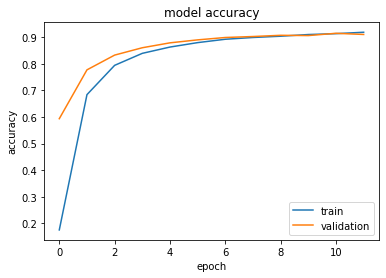

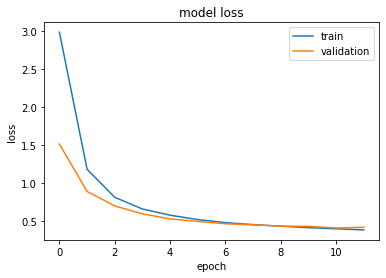

234/234 [==============================] - 2s 9ms/step
0.00547542735042735


In [28]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))

**Predictions**

In [29]:
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))
print(y_pred1)

234/234 [==============================] - 2s 9ms/step
0.00547542735042735
[ 5 15  5 ... 21  0  9]


### 2.2 Image processing

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu, rank, roberts, sobel, sobel_h, scharr, scharr_v, scharr_h,threshold_isodata
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, disk
from skimage.color import label2rgb
from skimage.feature import canny
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from scipy import ndimage as ndi
from skimage import feature, io
from skimage.segmentation import active_contour
from skimage import measure
from skimage.color import rgb2gray
from skimage.filters.rank import mean,  mean_bilateral

import cv2
import numpy as np
from PIL import Image
import os
import itertools

**Saving images**

In [10]:
#make new folder
cwd = os.getcwd()
print(cwd)
new_folder = "test_dataset1_images"
folder = os.path.join(cwd, new_folder)
os.makedirs(folder)

/Users/Sadjia/Documents/Machine learning/ML challenge new


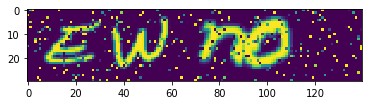

In [51]:
for i in range(25):
    plt.imshow(img_data[i])
    data = Image.fromarray(img_data[i])
    if data.mode != 'RGB':
        data = data.convert('RGB')
    data.save(str(folder)+'//test_image_'+str(i)+'.png')

**Splitting images**

In [54]:
coord_list = []
def split_image(coord_list):
    new_coord=[]
    updated_coord=[]
    final_coord=[]
    for i in range(len(coord_list)):
            args = [iter(coord_list)] * 4
            new_coord = list(itertools.zip_longest(*args, fillvalue=None))
    return sorted(new_coord)
split_image(coord_list)

[]

**Predictions**

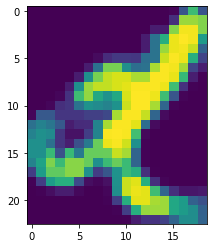

1/1 [==============================] - 0s 27ms/step
[23]


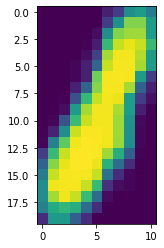

1/1 [==============================] - 0s 32ms/step
[23  6]


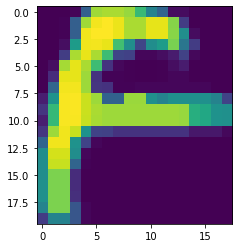

1/1 [==============================] - 0s 36ms/step
[23  6  5]


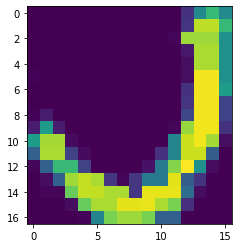

1/1 [==============================] - 0s 25ms/step
[23  6  5  9]


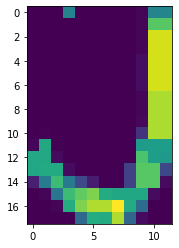

1/1 [==============================] - 0s 43ms/step
[9]


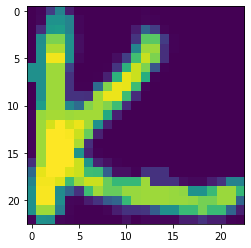

1/1 [==============================] - 0s 47ms/step
[ 9 10]


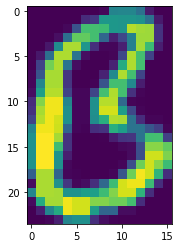

1/1 [==============================] - 0s 36ms/step
[ 9 10  1]


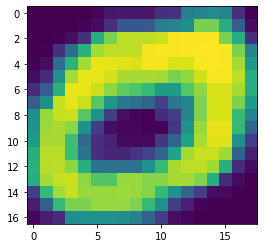

1/1 [==============================] - 0s 31ms/step
[ 9 10  1 16]


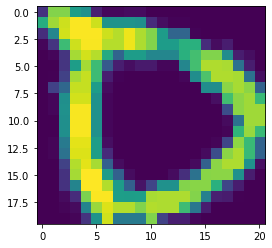

1/1 [==============================] - 0s 42ms/step
[3]
*********Two Images**********


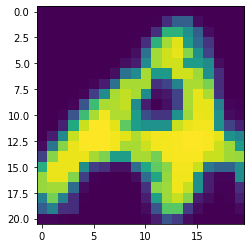

1/1 [==============================] - 0s 35ms/step
[3 0]
*********Two Images**********


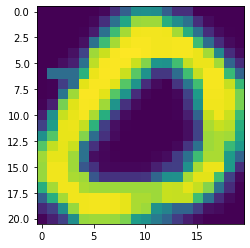

1/1 [==============================] - 0s 24ms/step
[ 3  0 16]


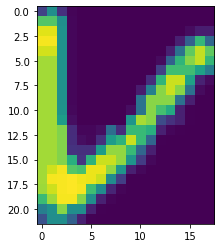

1/1 [==============================] - 0s 35ms/step
[ 3  0 16 21]


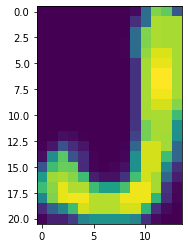

1/1 [==============================] - 0s 23ms/step
[9]


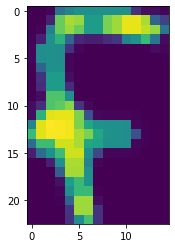

1/1 [==============================] - 0s 23ms/step
[9 5]


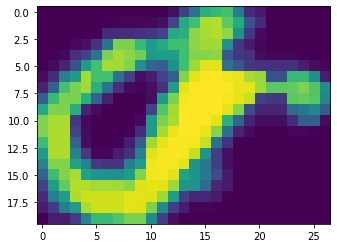

1/1 [==============================] - 0s 29ms/step
[9 5 6]


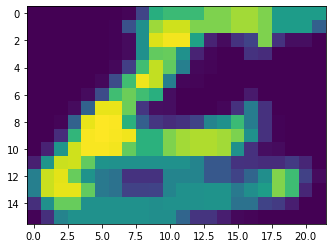

1/1 [==============================] - 0s 46ms/step
[6]


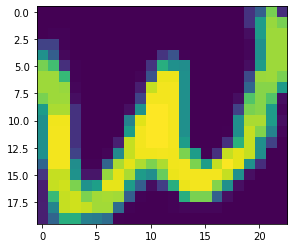

1/1 [==============================] - 0s 37ms/step
[ 6 22]
*********Two Images**********


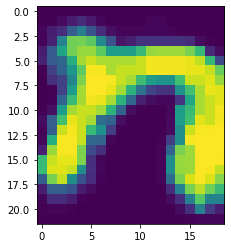

1/1 [==============================] - 0s 20ms/step
[ 6 22 12]
*********Two Images**********


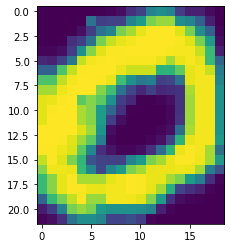

1/1 [==============================] - 0s 20ms/step
[ 6 22 12 16]


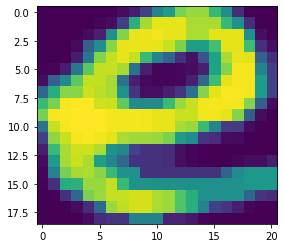

1/1 [==============================] - 0s 28ms/step
[1]
*********Two Images**********


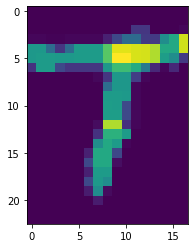

1/1 [==============================] - 0s 32ms/step
[ 1 19]
*********Two Images**********


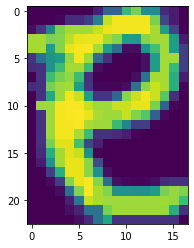

1/1 [==============================] - 0s 21ms/step
[ 1 19  1]


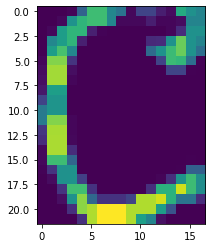

1/1 [==============================] - 0s 23ms/step
[ 1 19  1  2]


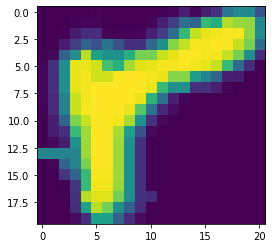

1/1 [==============================] - 0s 33ms/step
[5]


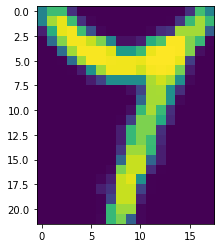

1/1 [==============================] - 0s 21ms/step
[ 5 19]
*********Two Images**********


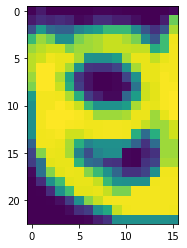

1/1 [==============================] - 0s 21ms/step
[ 5 19  1]
*********Two Images**********


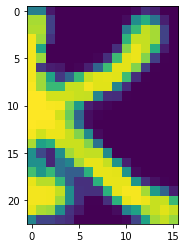

1/1 [==============================] - 0s 21ms/step
[ 5 19  1 10]


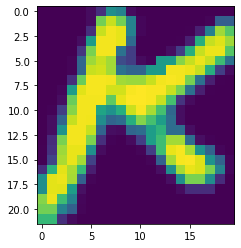

1/1 [==============================] - 0s 37ms/step
[10]


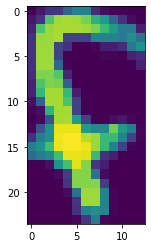

1/1 [==============================] - 0s 24ms/step
[10  5]


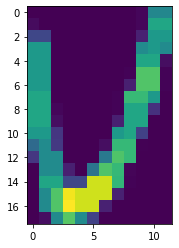

1/1 [==============================] - 0s 24ms/step
[10  5  9]


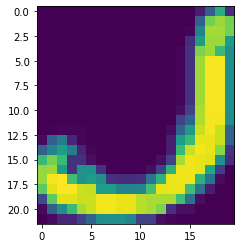

1/1 [==============================] - 0s 31ms/step
[10  5  9  9]


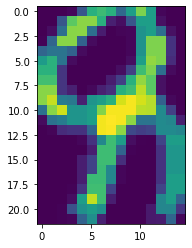

1/1 [==============================] - 0s 26ms/step
[16]
*********Two Images**********


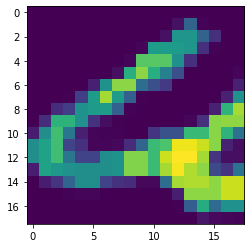

1/1 [==============================] - 0s 25ms/step
[16 16]
*********Two Images**********


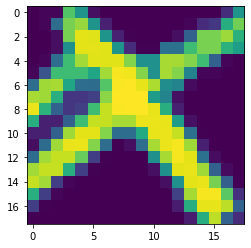

1/1 [==============================] - 0s 25ms/step
[16 16 10]


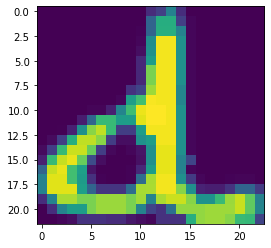

1/1 [==============================] - 0s 23ms/step
[16 16 10  3]
*********Two Images**********


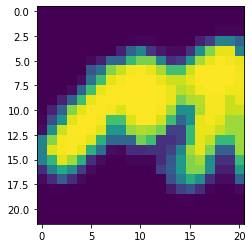

1/1 [==============================] - 0s 21ms/step
[12]
*********Two Images**********


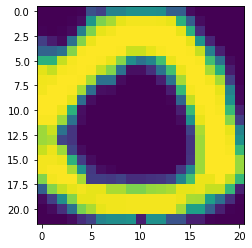

1/1 [==============================] - 0s 23ms/step
[12 16]


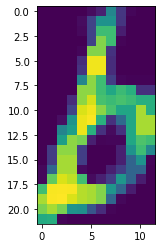

1/1 [==============================] - 0s 19ms/step
[12 16  1]


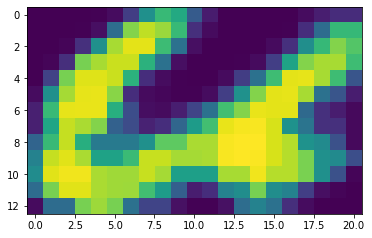

1/1 [==============================] - 0s 21ms/step
[12 16  1 20]


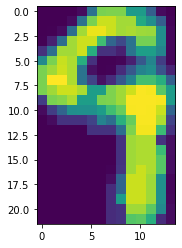

1/1 [==============================] - 0s 21ms/step
[16]


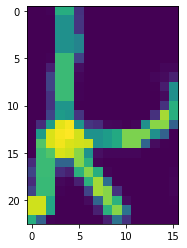

1/1 [==============================] - 0s 22ms/step
[16  1]


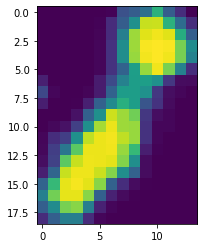

1/1 [==============================] - 0s 24ms/step
[16  1  6]


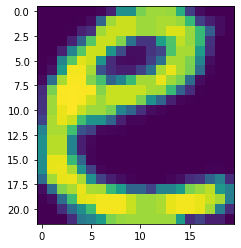

1/1 [==============================] - 0s 22ms/step
[16  1  6  4]


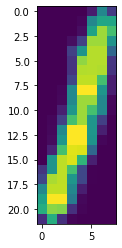

1/1 [==============================] - 0s 25ms/step
[6]
*********Two Images**********


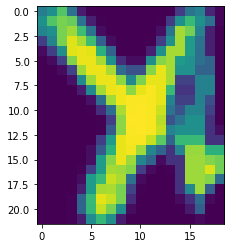

1/1 [==============================] - 0s 26ms/step
[6 1]
*********Two Images**********


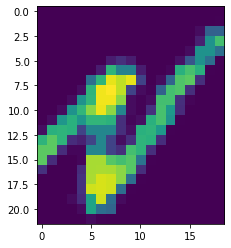

1/1 [==============================] - 0s 22ms/step
[6 1 6]


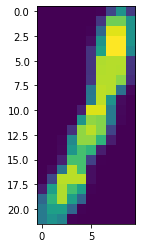

1/1 [==============================] - 0s 24ms/step
[6 1 6 5]


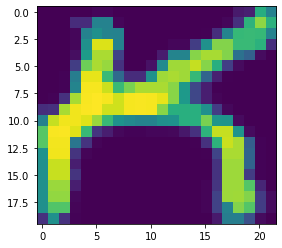

1/1 [==============================] - 0s 25ms/step
[10]


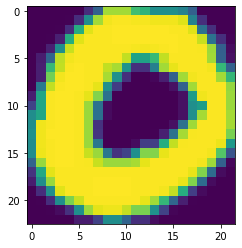

1/1 [==============================] - 0s 22ms/step
[10 16]


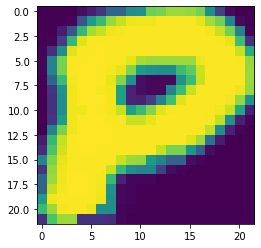

1/1 [==============================] - 0s 23ms/step
[10 16  1]


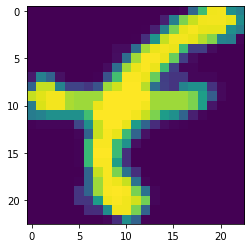

1/1 [==============================] - 0s 24ms/step
[10 16  1  5]


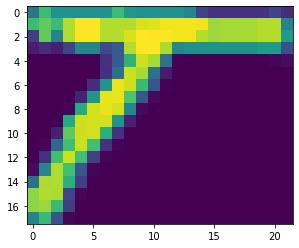

1/1 [==============================] - 0s 22ms/step
[5]


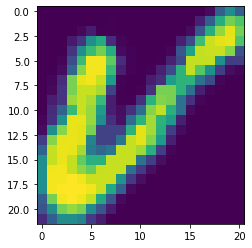

1/1 [==============================] - 0s 26ms/step
[ 5 21]


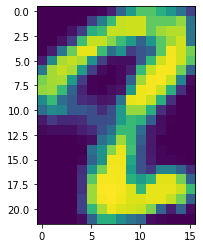

1/1 [==============================] - 0s 20ms/step
[ 5 21  1]


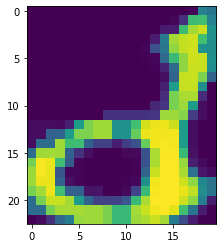

1/1 [==============================] - 0s 49ms/step
[ 5 21  1  3]


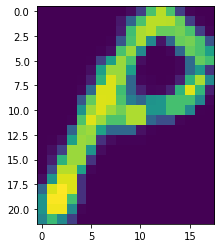

1/1 [==============================] - 0s 26ms/step
[15]


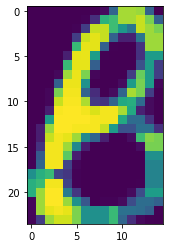

1/1 [==============================] - 0s 25ms/step
[15  6]


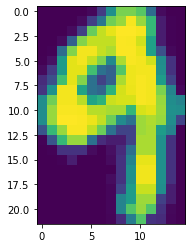

1/1 [==============================] - 0s 26ms/step
[15  6  6]


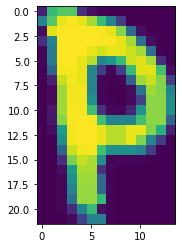

1/1 [==============================] - 0s 23ms/step
[15  6  6  5]


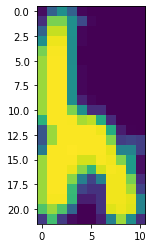

1/1 [==============================] - 0s 28ms/step
[7]


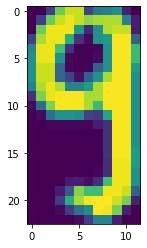

1/1 [==============================] - 0s 31ms/step
[7 6]


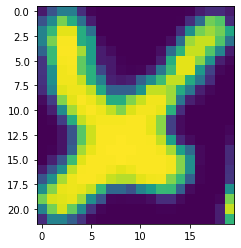

1/1 [==============================] - 0s 22ms/step
[ 7  6 10]


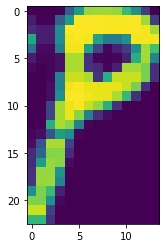

1/1 [==============================] - 0s 21ms/step
[ 7  6 10 15]


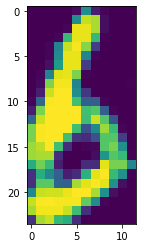

1/1 [==============================] - 0s 20ms/step
[6]
*********Two Images**********


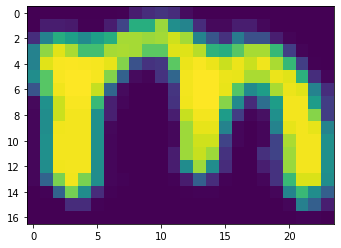

1/1 [==============================] - 0s 20ms/step
[ 6 12]
*********Two Images**********


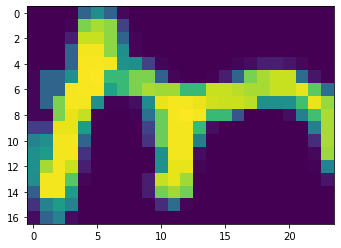

1/1 [==============================] - 0s 29ms/step
[ 6 12  6]


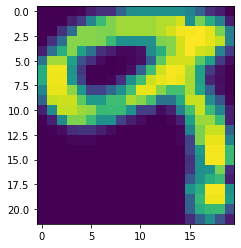

1/1 [==============================] - 0s 24ms/step
[ 6 12  6  6]


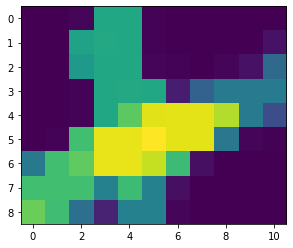

1/1 [==============================] - 0s 19ms/step
[1]


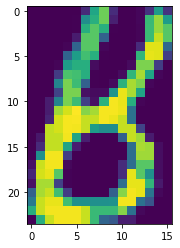

1/1 [==============================] - 0s 27ms/step
[1 1]


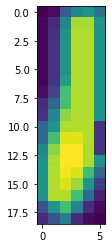

1/1 [==============================] - 0s 32ms/step
[ 1  1 16]


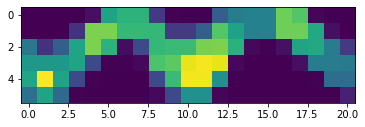

1/1 [==============================] - 0s 24ms/step
[ 1  1 16 22]


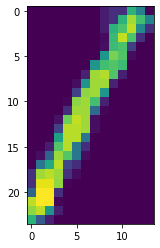

1/1 [==============================] - 0s 24ms/step
[5]


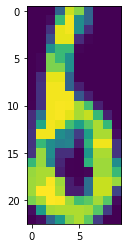

1/1 [==============================] - 0s 31ms/step
[5 1]


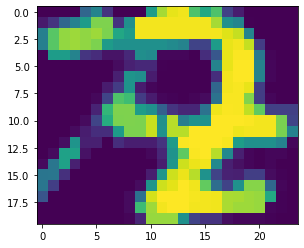

1/1 [==============================] - 0s 24ms/step
[ 5  1 16]


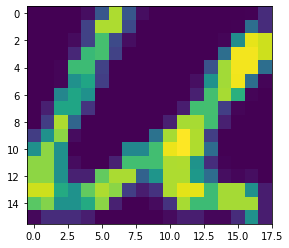

1/1 [==============================] - 0s 26ms/step
[20]
*********Two Images**********


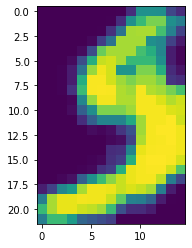

1/1 [==============================] - 0s 21ms/step
[20  6]
*********Two Images**********


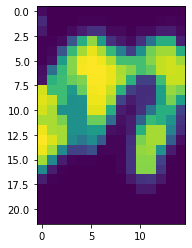

1/1 [==============================] - 0s 23ms/step
[20  6 12]


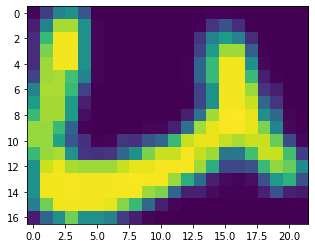

1/1 [==============================] - 0s 26ms/step
[20  6 12 22]


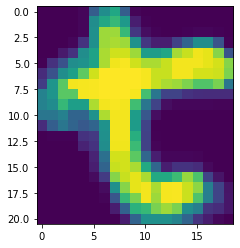

1/1 [==============================] - 0s 23ms/step
[4]


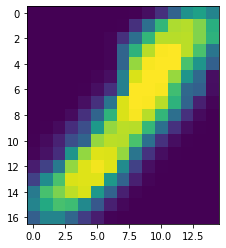

1/1 [==============================] - 0s 22ms/step
[4 6]


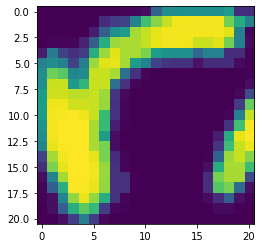

1/1 [==============================] - 0s 21ms/step
[ 4  6 17]


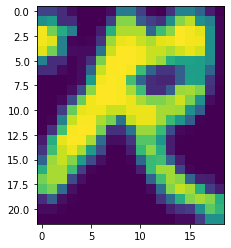

1/1 [==============================] - 0s 24ms/step
[ 4  6 17 17]


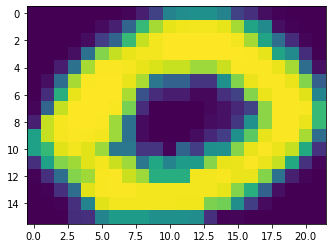

1/1 [==============================] - 0s 32ms/step
[16]


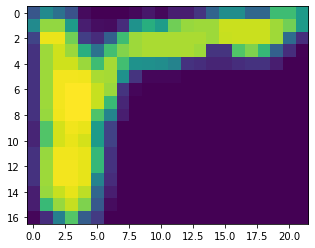

1/1 [==============================] - 0s 20ms/step
[16 17]


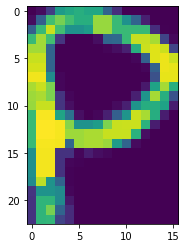

1/1 [==============================] - 0s 21ms/step
[16 17 15]


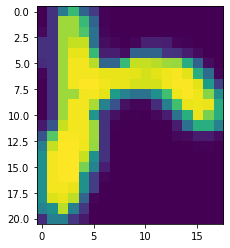

1/1 [==============================] - 0s 30ms/step
[16 17 15 17]


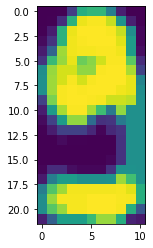

1/1 [==============================] - 0s 28ms/step
[1]


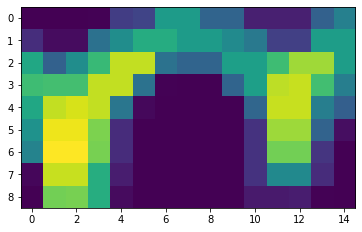

1/1 [==============================] - 0s 20ms/step
[ 1 13]


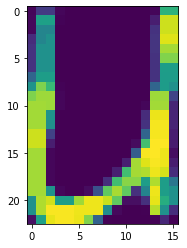

1/1 [==============================] - 0s 27ms/step
[ 1 13 22]


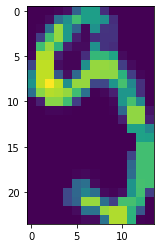

1/1 [==============================] - 0s 21ms/step
[ 1 13 22  6]


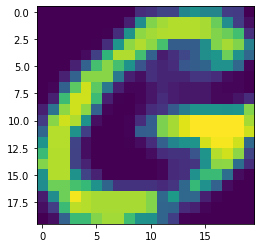

1/1 [==============================] - 0s 21ms/step
[6]


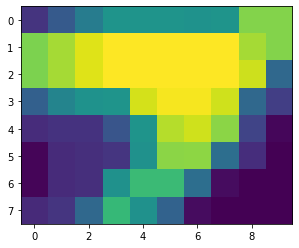

1/1 [==============================] - 0s 22ms/step
[ 6 16]


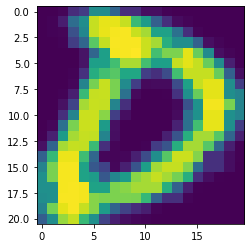

1/1 [==============================] - 0s 20ms/step
[ 6 16  3]


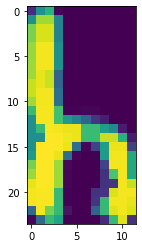

1/1 [==============================] - 0s 22ms/step
[ 6 16  3  7]


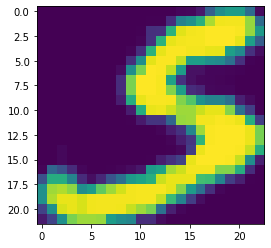

1/1 [==============================] - 0s 23ms/step
[ 6 16  3  7 18]


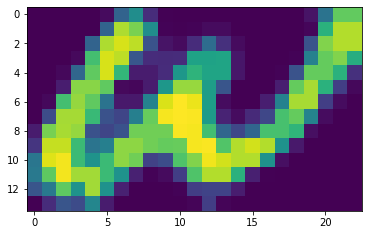

1/1 [==============================] - 0s 20ms/step
[22]


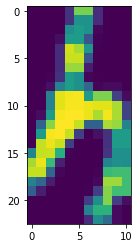

1/1 [==============================] - 0s 33ms/step
[22  0]


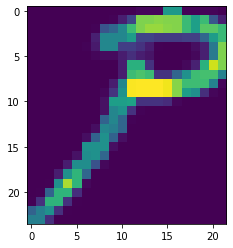

1/1 [==============================] - 0s 22ms/step
[22  0 15]


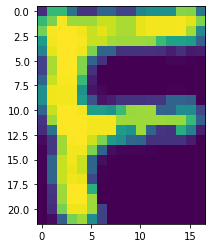

1/1 [==============================] - 0s 26ms/step
[22  0 15  5]
[array([23,  6,  5,  9]), array([ 9, 10,  1, 16]), array([ 3,  0, 16, 21]), array([9, 5, 6]), array([ 6, 22, 12, 16]), array([ 1, 19,  1,  2]), array([ 5, 19,  1, 10]), array([10,  5,  9,  9]), array([16, 16, 10,  3]), array([12, 16,  1, 20]), array([16,  1,  6,  4]), array([6, 1, 6, 5]), array([10, 16,  1,  5]), array([ 5, 21,  1,  3]), array([15,  6,  6,  5]), array([ 7,  6, 10, 15]), array([ 6, 12,  6,  6]), array([ 1,  1, 16, 22]), array([ 1,  1, 16, 22]), array([ 5,  1, 16]), array([20,  6, 12, 22]), array([ 4,  6, 17, 17]), array([16, 17, 15, 17]), array([ 1, 13, 22,  6]), array([ 6, 16,  3,  7, 18]), array([22,  0, 15,  5])]


In [53]:
predictions = []

folder="test_dataset1_images"
for filename in os.listdir(folder):
    coord_list=[]
    new_image_list=[]
    image_pred=[]
    sample_image = cv2.imread(os.path.join(folder,filename))
    
    if sample_image is not None:
        median_blr = cv2.medianBlur(sample_image, 3)
        plt.imshow(median_blr)
        median_blr.shape
        copy = median_blr.copy()
        gray = cv2.cvtColor(median_blr, cv2.COLOR_BGR2GRAY)
        prediction_image = gray
        thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
        ROI_number = 0
        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            #print(x,y,w,h)
            if w > 9  or h > 10 :
                coord_list.append(x)
                coord_list.append(w)
                coord_list.append(y)
                coord_list.append(h)
            cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),1)
            ROI_number += 1
        plt.imshow(copy)
       # cv2.waitKey()
        #print(coord_list)
    
    imk=prediction_image
    coords= split_image(coord_list)
    
    for i in range(len(coords)):
        if coords[i][1] >= 30 :
            new_w = coords[i][1] //2
            x_temp = 0
            for j in range(2):
                print("*********Two Images**********")
                w = new_w
                #img[x:x+w, y:y+h]
                imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0] + x_temp: coords[i][0] + x_temp + new_w]
                plt.imshow(imtest1)
                plt.show()
                res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
                new_image_list.append(np.asarray(res1))
                image_pred=np.array(new_image_list)
                image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
                preds1=model.predict_classes(image_pred, verbose=1)
                print(preds1[:len(coords)+1])
                del coord_list[:]
                np.delete(image_pred,0,0)
                x_temp = new_w
    
        else:
            imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
            plt.imshow(imtest1)
            plt.show()
            res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
            new_image_list.append(np.asarray(res1))
           # print("Inside for Image pred",np.array(image_pred).shape)
            image_pred=np.array(new_image_list)
            image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
           # print("shape",(image_pred.shape) )
            preds1=model.predict_classes(image_pred, verbose=1)
            print(preds1[:len(coords)+1])
            #print(image_pred.shape)
            del coord_list[:]
            np.delete(image_pred,0,0)
    
    predictions.append(preds1)

print(predictions)

**Top 5 predictions**

In [46]:
# image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
# print("shape",(image_pred.shape) )
# preds1=model.predict_classes(image_pred, verbose=1)
# print(preds1[:5])


In [50]:
# top_values_index = sorted(range(len(predictions)), key=lambda i: predictions[i])[-5:]
# print(top_values_index)

In [45]:
# import tensorflow as tf
# from tensorflow import keras

# model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = [tf.keras.metrics.TopKCategoricalAccuracy()])
# history1 = model.fit(X_train, Y_train, epochs=100, batch_size = 450, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

**Save predictions into csv file**

In [ ]:
# numpy.savetxt('C:/localpath/test.csv',prediction, ,delimiter=',')

# predictions = regressor.predict(X_test)
# res = pd.DataFrame(predictions)
# res.index = X_test.index # its important for comparison
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv")